In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
#import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [5]:
df = pd.read_csv('winequality-red-1.csv', sep=';')

In [6]:
df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
271           11.50              0.18         0.51            4.00       0.10   
579           10.60              0.31         0.49            2.20       0.06   
1481           8.20              0.28         0.60            3.00       0.10   
716            8.00              0.43         0.36            2.30       0.07   
1238           8.10              0.73         0.00            2.50       0.08   
552            9.50              0.46         0.24            2.70       0.09   
1463           6.90              0.63         0.01            2.40       0.08   
931            7.40              0.61         0.01            2.00       0.07   
558           10.90              0.53         0.49            4.60       0.12   
364           12.80              0.61         0.66            5.80       0.08   

      free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
271                  4.00                 23.00     1.00 3.28       0.97   
579                 18.00                 40.00     1.00 3.14       0.51   
1481                10.00                 22.00     1.00 3.39       0.68   
716                 10.00                 48.00     1.00 3.34       0.46   
1238                12.00                 24.00     1.00 3.38       0.46   
552                 14.00                 44.00     1.00 3.12       0.74   
1463                14.00                 39.00     1.00 3.34       0.53   
931                 13.00                 38.00     1.00 3.48       0.65   
558                 10.00                 17.00     1.00 3.07       0.56   
364                  7.00                 42.00     1.00 3.07       0.73   

      alcohol  quality  
271     10.10        6  
579      9.80        6  
1481    10.60        5  
716      9.40        5  
1238     9.60        4  
552     10.00        6  
1463    10.80        6  
931      9.80        5  
558     11.70        6  
364     10.00        7

In [7]:
df.shape

(1599, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
df.describe().T

count  mean   std  min   25%   50%   75%    max
fixed acidity        1,599.00  8.32  1.74 4.60  7.10  7.90  9.20  15.90
volatile acidity     1,599.00  0.53  0.18 0.12  0.39  0.52  0.64   1.58
citric acid          1,599.00  0.27  0.19 0.00  0.09  0.26  0.42   1.00
residual sugar       1,599.00  2.54  1.41 0.90  1.90  2.20  2.60  15.50
chlorides            1,599.00  0.09  0.05 0.01  0.07  0.08  0.09   0.61
free sulfur dioxide  1,599.00 15.87 10.46 1.00  7.00 14.00 21.00  72.00
total sulfur dioxide 1,599.00 46.47 32.90 6.00 22.00 38.00 62.00 289.00
density              1,599.00  1.00  0.00 0.99  1.00  1.00  1.00   1.00
pH                   1,599.00  3.31  0.15 2.74  3.21  3.31  3.40   4.01
sulphates            1,599.00  0.66  0.17 0.33  0.55  0.62  0.73   2.00
alcohol              1,599.00 10.42  1.07 8.40  9.50 10.20 11.10  14.90
quality              1,599.00  5.64  0.81 3.00  5.00  6.00  6.00   8.00

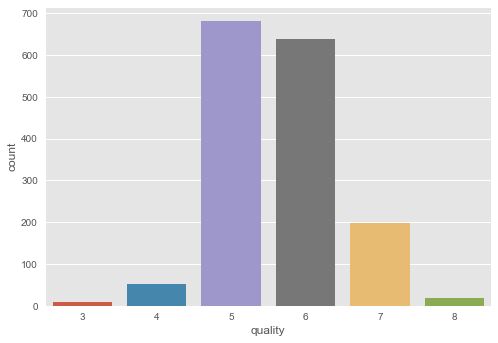

In [10]:
sns.countplot(df['quality'])

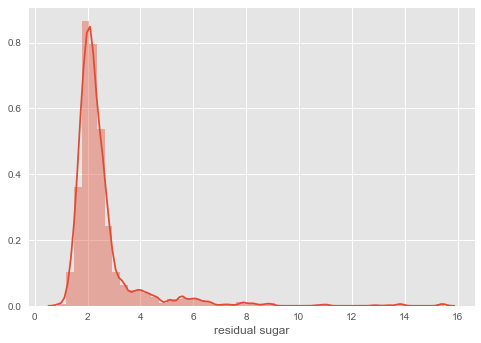

In [11]:
sns.distplot(df['residual sugar'])

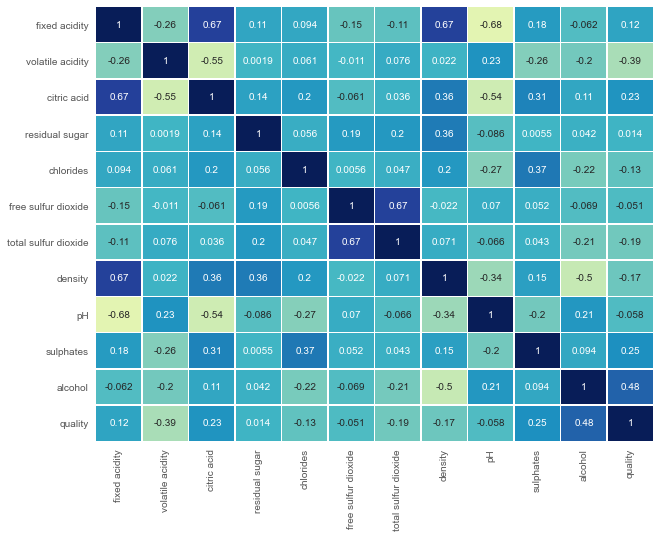

In [12]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [13]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
#Combine 7&8 together; combine 3 and 4 with 5 so that we have only 3 levels and a more balanced Y variable
mapping = {7:8, 3:5, 4:5}

df['quality'] = df['quality'].replace(mapping)
df['quality'].value_counts()

5    744
6    638
8    217
Name: quality, dtype: int64

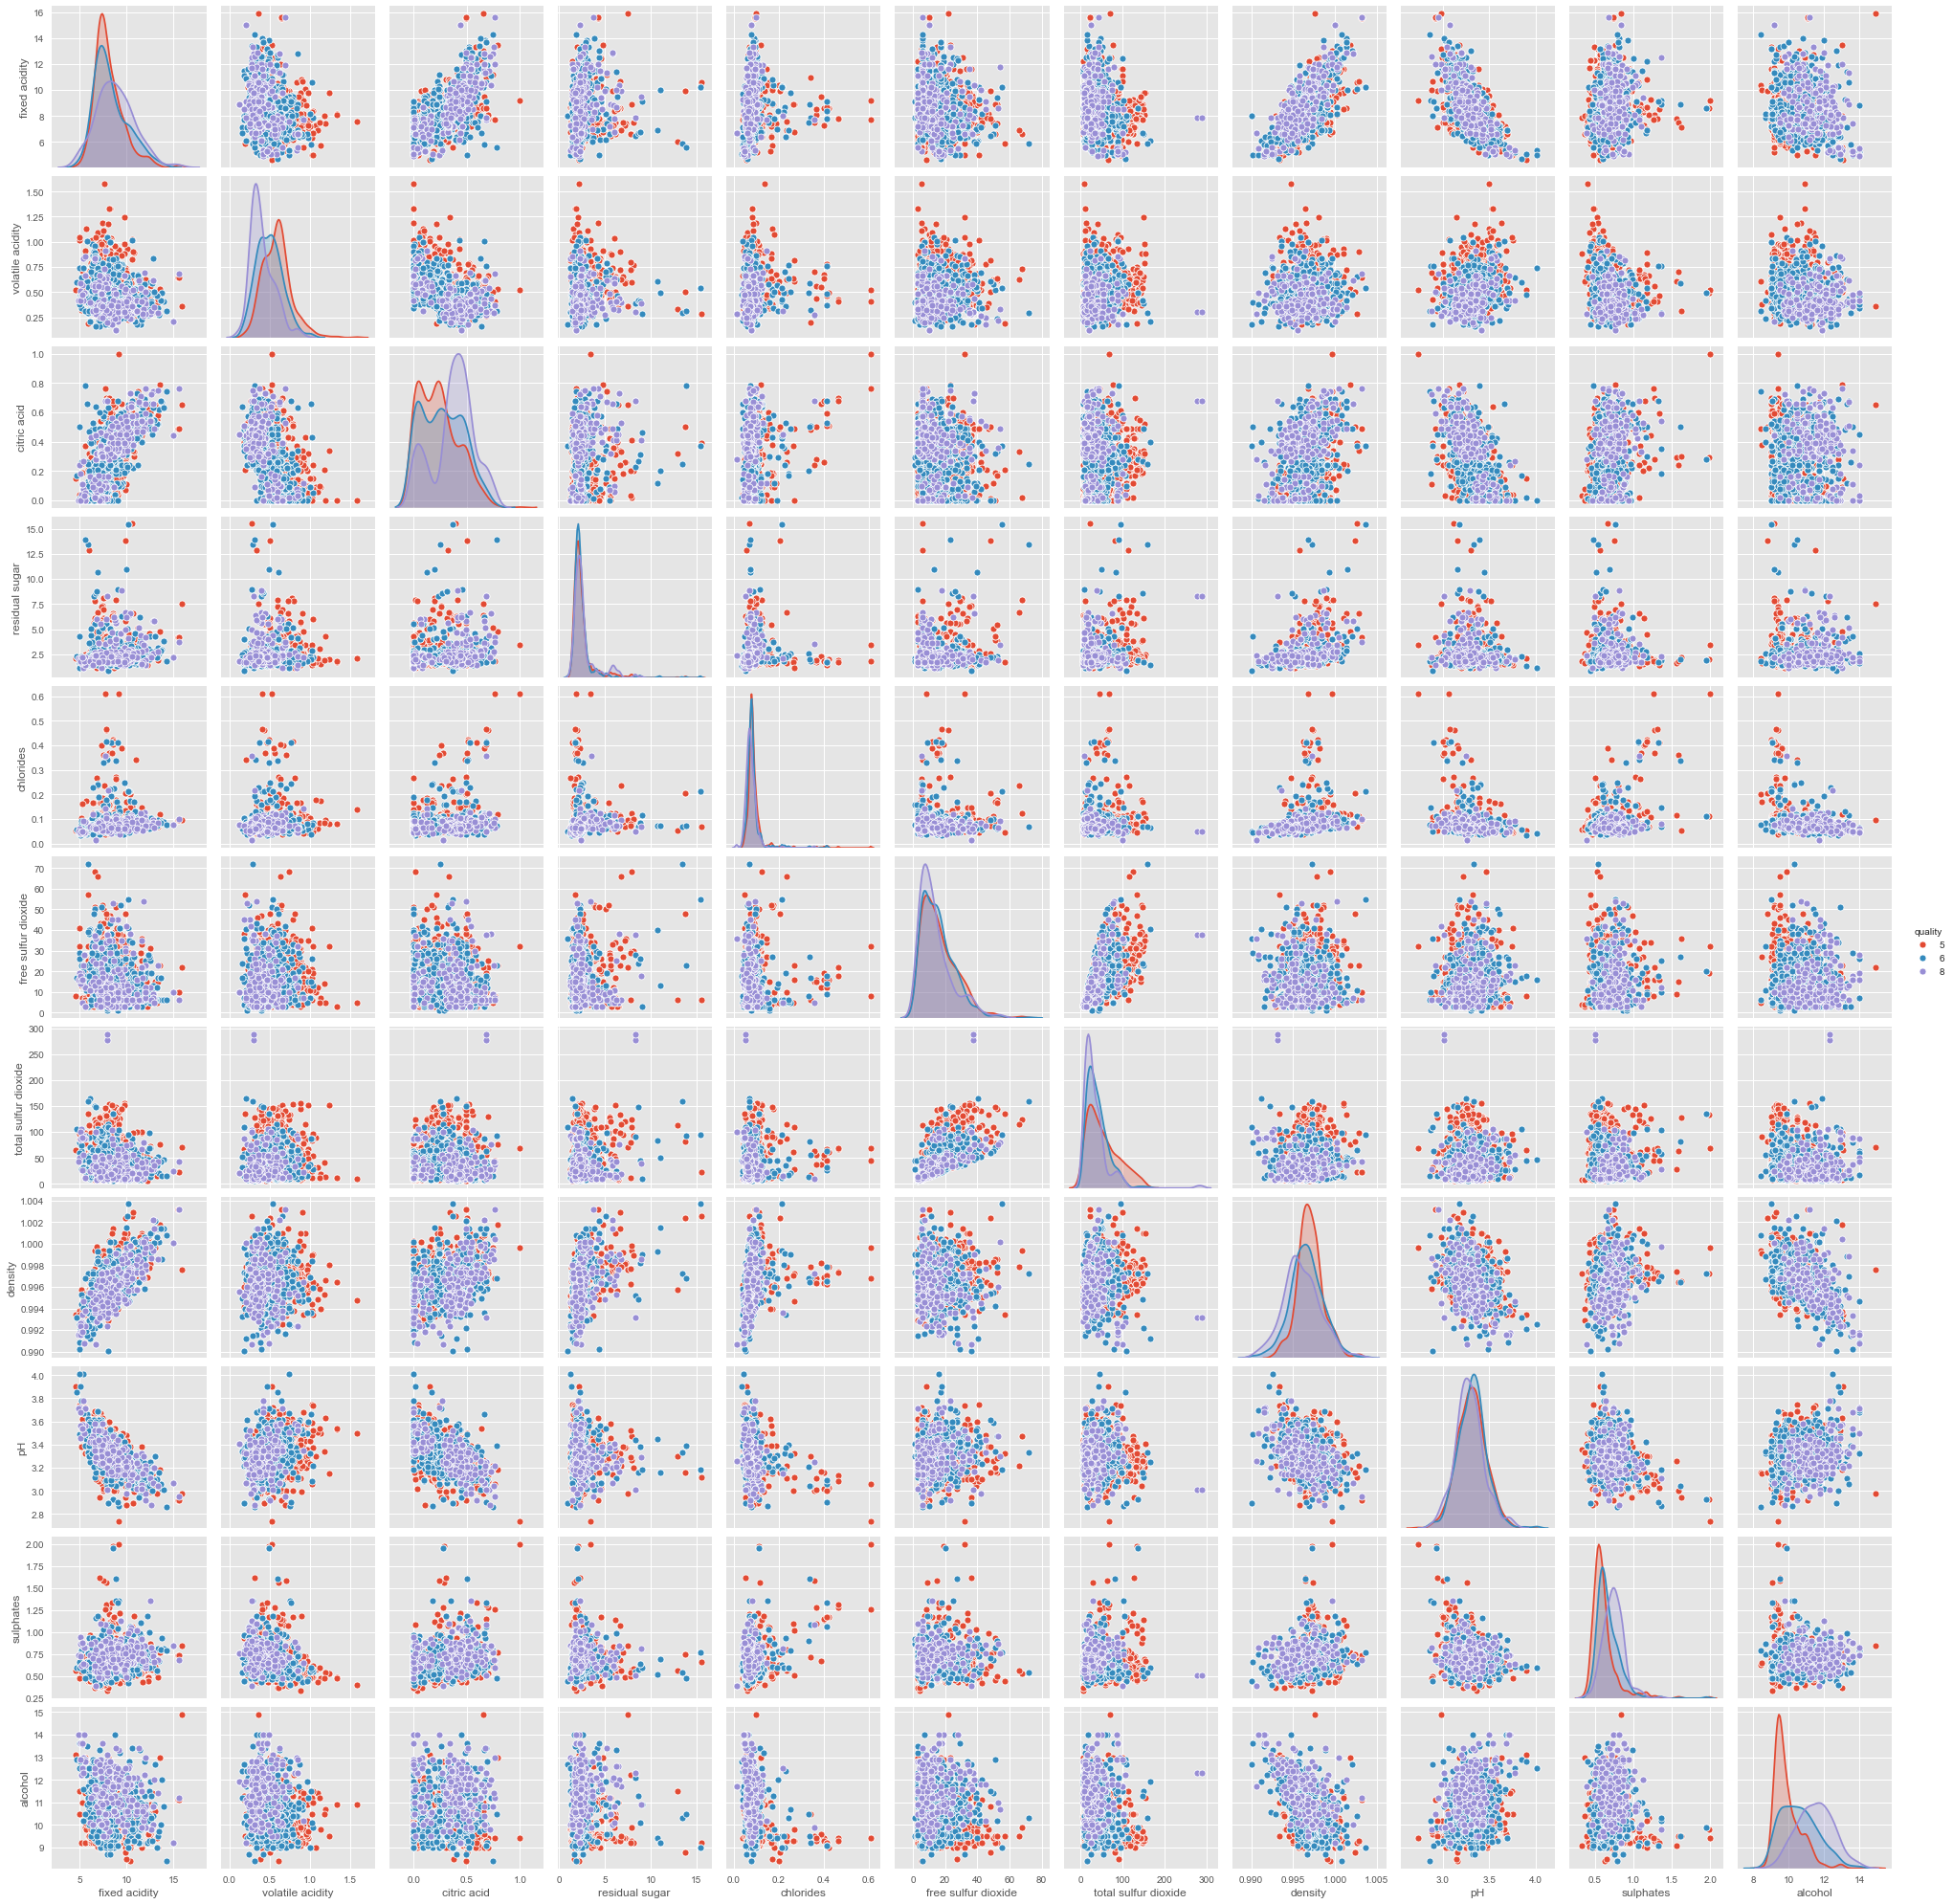

In [15]:
sns.pairplot(df, hue = 'quality')

In [16]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

features = [col for col in df.columns if col != 'quality']

X_train, X_test, y_train, y_test = train_test_split(df[features], df['quality'], test_size=.3, random_state=22)
X_train.shape, X_test.shape

((1119, 11), (480, 11))

In [17]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  

model_entropy = DecisionTreeClassifier(criterion='entropy')

In [18]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.66


In [20]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
print("Train: %.2f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.65
Test: 0.62


In [22]:
y_train.value_counts()

5    514
6    448
8    157
Name: quality, dtype: int64

In [38]:
from IPython.display import Image  
from sklearn import tree
from os import system

In [45]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('deposit_tree.dot','w')
dot_data = export_graphviz(clf_pruned,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['5','6','8'])
#dot_data = tree.export_graphviz(clf_pruned, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

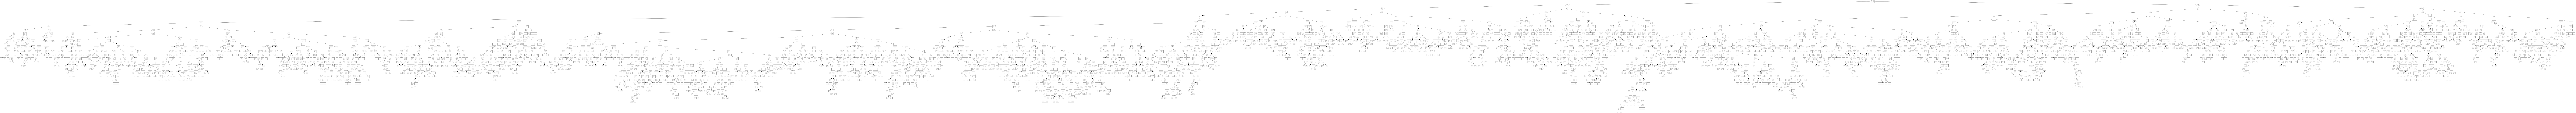

In [46]:
retCode = system("dot -Tpng deposit_tree.dot -o deposit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("deposit_tree.png"))

In [ ]:
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['5','6','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('wines_pruned.png')
Image(graph.create_png())

In [25]:
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

In [26]:
pd.crosstab(y_test, preds_test, rownames=['Actual'], colnames=['Predicted'])

Predicted    5   6   8
Actual                
5          167  57   6
6           70  98  22
8            5  23  32

C:\Users\srisi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\Users\srisi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000014DD9CEDA60>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x0000014DD9CED790>,
                     model=None)

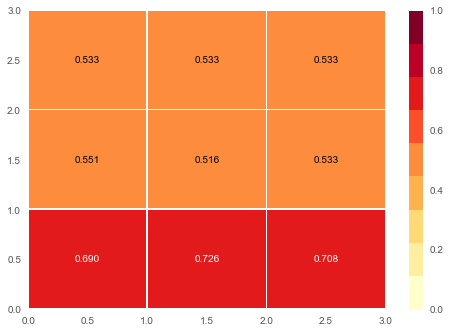

In [27]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

C:\Users\srisi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000014DD9D8E1C0>,
       binary=None, model=None)

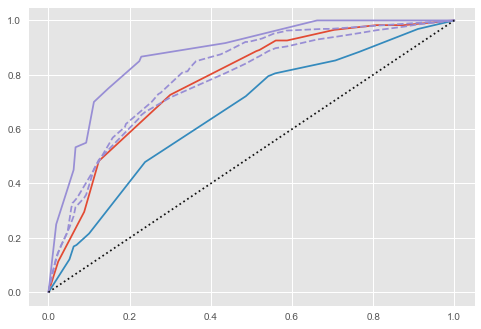

In [28]:
roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc

In [29]:
df['ProbQuality_5'] = clf_pruned.predict_proba(df[features])[:,0]
df['ProbQuality_6'] = clf_pruned.predict_proba(df[features])[:,1]
df['ProbQuality_8'] = clf_pruned.predict_proba(df[features])[:,2]
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           7.40              0.70         0.00            1.90       0.08   
1           7.80              0.88         0.00            2.60       0.10   
2           7.80              0.76         0.04            2.30       0.09   
3          11.20              0.28         0.56            1.90       0.07   
4           7.40              0.70         0.00            1.90       0.08   
5           7.40              0.66         0.00            1.80       0.07   
6           7.90              0.60         0.06            1.60       0.07   
7           7.30              0.65         0.00            1.20       0.07   
8           7.80              0.58         0.02            2.00       0.07   
9           7.50              0.50         0.36            6.10       0.07   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                11.00                 34.00     1.00 3.51       0.56   
1                25.00                 67.00     1.00 3.20       0.68   
2                15.00                 54.00     1.00 3.26       0.65   
3                17.00                 60.00     1.00 3.16       0.58   
4                11.00                 34.00     1.00 3.51       0.56   
5                13.00                 40.00     1.00 3.51       0.56   
6                15.00                 59.00     1.00 3.30       0.46   
7                15.00                 21.00     0.99 3.39       0.47   
8                 9.00                 18.00     1.00 3.36       0.57   
9                17.00                102.00     1.00 3.35       0.80   

   alcohol  quality  ProbQuality_5  ProbQuality_6  ProbQuality_8  
0     9.40        5           0.52           0.43           0.05  
1     9.80        5           0.76           0.24           0.00  
2     9.80        5           0.52           0.43           0.05  
3     9.80        6           0.00           0.67           0.33  
4     9.40        5           0.52           0.43           0.05  
5     9.40        5           0.52           0.43           0.05  
6     9.40        5           0.82           0.18           0.00  
7    10.00        8           0.50           0.00           0.50  
8     9.50        8           0.52           0.43           0.05  
9    10.50        5           0.37           0.56           0.07

In [30]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
alcohol              0.52
sulphates            0.18
volatile acidity     0.17
total sulfur dioxide 0.06
free sulfur dioxide  0.03
density              0.02
chlorides            0.02
residual sugar       0.01
fixed acidity        0.00
citric acid          0.00
pH                   0.00

In [31]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree      0.62

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [33]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [34]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree      0.62
0  Random Forest      0.69

C:\Users\srisi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
C:\Users\srisi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000014DD9E84EB0>,
                     cmap=<matplotlib.colors.ListedColormap object at 0x0000014DD9E846A0>,
                     model=None)

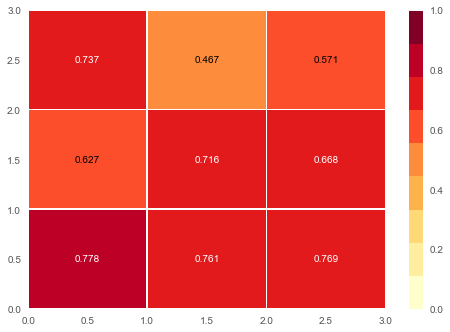

In [35]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz

C:\Users\srisi\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


ROCAUC(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000014DD9F28F70>,
       binary=None, model=None)

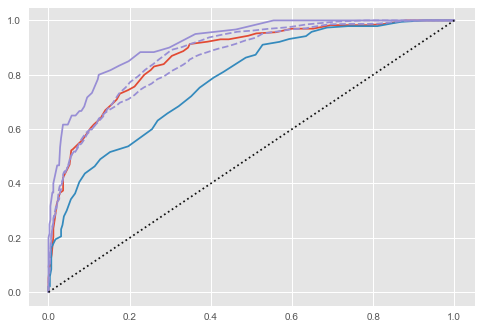

In [36]:
roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc